$\Large\textbf{Welcome to IE 684 (Spring 2021-22)}$  

$\large\textbf{Lab 1 Exercise 1. }$

We will start with a procedure which helps to find a minimizer of the function $f(\mathbf{x})=f(x_1,x_2)= (x_1+100)^2 + (x_2-25)^2$. 

Note that the gradient of $f(\mathbf{x})$ is given by:

$
\nabla f(\mathbf{x}) = \begin{bmatrix} \frac{\partial f(\mathbf{x})}{\partial x_1} \\ \frac{\partial f(\mathbf{x})}{\partial x_2}\end{bmatrix}. 
$

We will use the following gradient descent type algorithm: 

\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$, Steplength $\eta$}  \\
& \textbf{Initialize } k=0 \\ 
&\textbf{While } \| \nabla f(\mathbf{x}^k) \|_2 > \tau \text{ do:}  \\   
&\quad \quad \mathbf{x}^{k+1} \leftarrow \mathbf{x}^k - \eta \nabla f(\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}


In [1]:
#numpy package will be used for most of our lab exercises. Please have a look at https://numpy.org/doc/stable/ for numpy documentation
#we will first import the numpy package and name it as np
import numpy as np 
#Henceforth, we can lazily use np to denote the much longer numpy !! 

In [2]:

#Now we will define a function which will compute and return the function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray 
  assert len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  return (x[0]+100)**2 + (x[1]-25)**2


In [3]:
#check whether you can pass arbitrary arguments to evalf 
#my_x = [1,3] #Note: my_x is a list of 2 elements, but not a numpy array
#print('f(my_x) is:',evalf(my_x))

In [4]:
# First we will create a numpy array of size 2
my_x = np.array([1,2])
print('type of my_x',type(my_x), 'length of my_x:',len(my_x)) #verify if my_x is indeed a numpy array of size 2


type of my_x <class 'numpy.ndarray'> length of my_x: 2


In [5]:

#now call evalf (x) with my_x as argument and check if it works
#print(evalf(my_x))

In [6]:
#Now we will define a function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  return np.array([2*(x[0]+100),2*(x[1]-25)])

In [7]:
def find_minimizer(start_x, tol, step_length):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  assert type(step_length) is float and step_length>=0 
  x = start_x
  g_x = evalg(x)
  k = 0

  #we can manage a list to store the function values, might be useful for plotting 
  fvals = [evalf(x)]
  print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    #append the current function value to the list containing function values
    fvals.append(evalf(x))
    print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x, fvals 


In [8]:
my_start_x = np.array([10,10])
my_steplength = 0.1
my_tol= 1e-3 #10^{-3} or 0.001
opt_x, fvals_ret = find_minimizer(my_start_x, my_tol, my_steplength)
print('Optimizer:',opt_x)

iter: 0  x: [10 10]  f(x): 12325  grad at x: [220 -30]  gradient norm: 222.03603311174518
iter: 1  x: [-12.  13.]  f(x): 7888.0  grad at x: [176. -24.]  gradient norm: 177.62882648939615
iter: 2  x: [-29.6  15.4]  f(x): 5048.320000000001  grad at x: [140.8 -19.2]  gradient norm: 142.10306119151693
iter: 3  x: [-43.68  17.32]  f(x): 3230.9247999999993  grad at x: [112.64 -15.36]  gradient norm: 113.68244895321352
iter: 4  x: [-54.944  18.856]  f(x): 2067.791872  grad at x: [ 90.112 -12.288]  gradient norm: 90.94595916257082
iter: 5  x: [-63.9552  20.0848]  f(x): 1323.3867980799996  grad at x: [72.0896 -9.8304]  gradient norm: 72.75676733005665
iter: 6  x: [-71.16416  21.06784]  f(x): 846.9675507711995  grad at x: [57.67168 -7.86432]  gradient norm: 58.20541386404531
iter: 7  x: [-76.931328  21.854272]  f(x): 542.0592324935676  grad at x: [46.137344 -6.291456]  gradient norm: 46.56433109123625
iter: 8  x: [-81.5450624  22.4834176]  f(x): 346.9179087958833  grad at x: [36.9098752 -5.03316

# **Exercise 1,Ans 2:**              The minimizer is [-99.99958844  24.99994388] and function value is 1.7253033717248775e-07. 

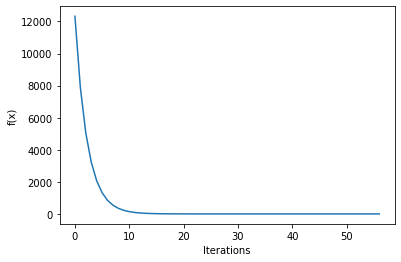

In [9]:
#we will plot the function values and check the behavior
import matplotlib.pyplot as plt #package useful for plotting
plt.plot(fvals_ret)
plt.xlabel('Iterations')
plt.ylabel('f(x)')
plt.show()

In [22]:
def find_minimizer3(start_x, tol, step_length):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  assert type(step_length) is float and step_length>=0 
  x = start_x
  g_x = evalg(x)
  k = 0

  #we can manage a list to store the function values, might be useful for plotting 
  fvals = [evalf(x)]
  print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    #append the current function value to the list containing function values
    fvals.append(evalf(x))

  return x, fvals[-1], k 

iter: 0  x: [10 10]  f(x): 12325  grad at x: [220 -30]  gradient norm: 222.03603311174518
final minimizer is:- [-99.9553787   24.99391528] final objective function value is:- 0.0020280843668995063
iter: 0  x: [10 10]  f(x): 12325  grad at x: [220 -30]  gradient norm: 222.03603311174518
final minimizer is:- [-99.99520882  24.99934666] final objective function value is:- 2.3382220797474075e-05
iter: 0  x: [10 10]  f(x): 12325  grad at x: [220 -30]  gradient norm: 222.03603311174518
final minimizer is:- [-99.99958844  24.99994388] final objective function value is:- 1.7253033717248775e-07
iter: 0  x: [10 10]  f(x): 12325  grad at x: [220 -30]  gradient norm: 222.03603311174518
final minimizer is:- [-99.99995581  24.99999397] final objective function value is:- 1.989139359193299e-09
iter: 0  x: [10 10]  f(x): 12325  grad at x: [220 -30]  gradient norm: 222.03603311174518
final minimizer is:- [-99.99999526  24.99999935] final objective function value is:- 2.293321544605827e-11
iter: 0  x: [

Text(0, 0.5, 'no of iterations')

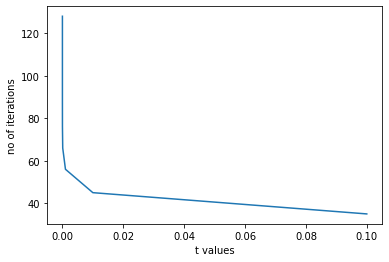

In [29]:

start_x = np.array([10,10])
step_length = 0.1
k=[]
tolerance = [10**(-p) for p in range (1,11)]
for i in tolerance:
  final_minimizer,final_objective,iteration=find_minimizer3(start_x,i,step_length)
  print('final minimizer is:-', final_minimizer,'final objective function value is:-', final_objective)
  k.append(iteration)
import matplotlib.pyplot as plt
plt.plot(tolerance,k)
plt.xlabel('t values')
plt.ylabel('no of iterations')

# **Exercise 1, Ans 3:** 

My observation is as the value of tolerance goes on decreases, the no of iterations goes on increases,  and with decrease of tolerance values the value of minimizer approaches to [-100,25] and the optimal value tends to zero.

iter: 0  x: [10 10]  f(x): 12325  grad at x: [220 -30]  gradient norm: 222.03603311174518
final minimizer is:- [-99.99999505  24.99999932] final objective function value is:- 2.49936770204995e-11
iter: 0  x: [10 10]  f(x): 12325  grad at x: [220 -30]  gradient norm: 222.03603311174518
final minimizer is:- [-99.99999505  24.99999933] final objective function value is:- 2.494219709847674e-11
iter: 0  x: [10 10]  f(x): 12325  grad at x: [220 -30]  gradient norm: 222.03603311174518
final minimizer is:- [-99.99999512  24.99999933] final objective function value is:- 2.4304673044883465e-11
iter: 0  x: [10 10]  f(x): 12325  grad at x: [220 -30]  gradient norm: 222.03603311174518
final minimizer is:- [-99.99999526  24.99999935] final objective function value is:- 2.293321544605827e-11
iter: 0  x: [10 10]  f(x): 12325  grad at x: [220 -30]  gradient norm: 222.03603311174518
final minimizer is:- [-99.99999685  24.99999957] final objective function value is:- 1.011747066175869e-11
iter: 0  x: [10

Text(0, 0.5, 'no of iterations')

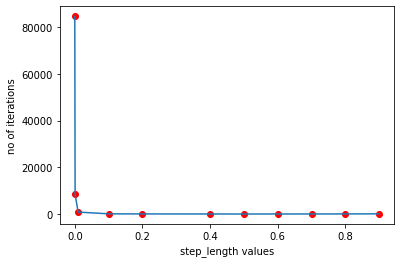

In [32]:

start_x = np.array([10,10])
step_length = [0.0001,0.001,0.01,0.1,0.2,0.4,0.5,0.6,0.7,0.8,0.9]
k=[]
tolerance = 10**(-5)
for i in step_length:
  final_minimizer,final_objective,iteration=find_minimizer3(start_x,tolerance,i)
  print('final minimizer is:-', final_minimizer,'final objective function value is:-', final_objective)
  k.append(iteration)
import matplotlib.pyplot as plt
plt.plot(step_length,k)
plt.scatter(step_length,k,color='r')
plt.xlabel('step_length values')
plt.ylabel('no of iterations')

In [28]:
print(k)

[84571, 8450, 838, 76, 34, 11, 1, 11, 19, 34, 76]


# **Exercise 1,Ans 4:** 

I observed that as we increase the value of step length from 0.0001 to 0.5 the number of iterations decreases but after 0.5 it again starts increasing and number of iterations is minimum (i.e. 1) at step length= 0.5.

In [23]:
start_x = [[10000,10000],[500,0],[0,1000],[1,1],[-500,-2]]
step_length = 0.1
k=[]
score=[]
tolerance = 10**(-5)
for i in start_x:
  final_minimizer,final_objective,iteration=find_minimizer3(np.array(i),tolerance,step_length)
  score.append([i,final_minimizer,final_objective,iteration])
  print('final minimizer is:-', final_minimizer,'final objective function value is:-', final_objective)
  k.append(iteration)
score=np.transpose(score)

iter: 0  x: [10000 10000]  f(x): 201510625  grad at x: [20200 19950]  gradient norm: 28390.887622615817
final minimizer is:- [-99.99999679  25.00000317] final objevtive function value is:- 2.0414342669998657e-11
iter: 0  x: [500   0]  f(x): 360625  grad at x: [1200  -50]  gradient norm: 1201.0412149464314
final minimizer is:- [-99.99999566  24.99999982] final objevtive function value is:- 1.888746375147865e-11
iter: 0  x: [   0 1000]  f(x): 960625  grad at x: [ 200 1950]  gradient norm: 1960.229578391266
final minimizer is:- [-99.99999954  25.00000452] final objevtive function value is:- 2.060780080476227e-11
iter: 0  x: [1 1]  f(x): 10777  grad at x: [202 -48]  gradient norm: 207.62466134830902
final minimizer is:- [-99.99999564  24.99999896] final objevtive function value is:- 2.0052840841640608e-11
iter: 0  x: [-500   -2]  f(x): 160729  grad at x: [-800  -54]  gradient norm: 801.8204287744232
final minimizer is:- [-100.00000452   24.99999969] final objevtive function value is:- 2.05

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


|index|starting point|final minimizer|final objective|iteration|
|---|---|---|---|---|
|0|10000,10000|\[-99\.99999679  25\.00000317\]|2\.0414342669998657e-11|98|
|1|500,0|\[-99\.99999566  24\.99999982\]|1\.888746375147865e-11|84|
|2|0,1000|\[-99\.99999954  25\.00000452\]|2\.060780080476227e-11|86|
|3|1,1|\[-99\.99999564  24\.99999896\]|2\.0052840841640608e-11|76|
|4|-500,-2|\[-100\.00000452   24\.99999969\]|2\.055190630073527e-11|82|

# ***Exercise 1,Ans 5:*** 

 The table is shown above  listing the final minimizer,
final objective function value and number of iterations taken by the algorithm to terminate for the different
starting points. 

My observation is as we got highest number of iterations for starting point 10000,10000  and minimum number of iterations for starting point 1,1  and for every starting point the optimal value is approximately zero and the optimizer value for all starting points are approximately equal to [-100,25].